# 🧬 Homology Modeling Pipeline (HMP)
This notebook simulates a basic **homology modeling workflow** by:

- 📥 Downloading a known template structure from PDB
- 📂 Uploading your target FASTA sequence
- 🧬 Extracting template sequence from PDB file
- 🧬 Aligning target vs template sequences
- 📊 Showing the alignment, frequency plots, and sequence summaries

✅ Tools: BioPython, Pandas, Matplotlib



In [7]:
!pip install biopython

from Bio import PDB, SeqIO, pairwise2
from Bio.PDB import PDBList
from Bio.Data.IUPACData import protein_letters_3to1
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

## 📥 Download Template Structure by PDB ID
We fetch a known protein structure from RCSB PDB.


In [8]:
pdb_id = "1TIM"  # Example: TIM protein, well studied
pdbl = PDBList()
pdbl.retrieve_pdb_file(pdb_id, pdir='.', file_format='pdb')
template_file = f"pdb{pdb_id.lower()}.ent"
print(f"✅ Downloaded template PDB file: {template_file}")

Structure exists: './pdb1tim.ent' 
✅ Downloaded template PDB file: pdb1tim.ent


## 📂 Upload Your Target FASTA File
This should be your **query sequence** (protein).


In [9]:
uploaded = files.upload()
fasta_file = list(uploaded.keys())[0]

record = SeqIO.read(fasta_file, "fasta")
target_seq = record.seq
print(f"✅ Target sequence loaded: {record.id}, length: {len(target_seq)}")

Saving sequence.fasta to sequence (1).fasta
✅ Target sequence loaded: Sample_Target_Protein, length: 33


## 🧬 Extract Template Sequence from PDB
We build a string of 1-letter amino acid codes.



In [10]:
parser = PDB.PDBParser(QUIET=True)
structure = parser.get_structure("template", template_file)

template_seq = ""
for model in structure:
    for chain in model:
        for residue in chain:
            if PDB.is_aa(residue):
                res_name = residue.get_resname().capitalize()
                if res_name in protein_letters_3to1:
                    template_seq += protein_letters_3to1[res_name]
                else:
                    template_seq += "X"

print(f"✅ Extracted template sequence: {len(template_seq)} residues")

✅ Extracted template sequence: 494 residues


## 📝 Wrapped Template Sequence
Easy to read 60-character lines.

In [11]:
def wrap_sequence(seq, width=60):
    return '\n'.join(seq[i:i+width] for i in range(0, len(seq), width))

print("🧬 Template sequence:")
print(wrap_sequence(template_seq))

🧬 Template sequence:
APRKFFVGGNWKMNGKRKSLGELIHTLDGAKLSADTEVVCGAPSIYLDFARQKLDAKIGV
AAQNCYKVPKGAFTGEISPAMIKDIGAAWVILGHSERRHVFGESDELIGQKVAHALAEGL
GVIACIGEKLDEREAGITEKVVFQETKAIADNVKDWSKVVLAYEPVWAIGTGKTATPQQA
QEVHEKLRGWLKTHVSDAVAVQSRIIYGGSVTGGNCKELASQHDVDGFLVGGASLKPEFV
DIINAKHAPRKFFVGGNWKMNGKRKSLGELIHTLDGAKLSADTEVVCGAPSIYLDFARQK
LDAKIGVAAQNCYKVPKGAFTGEISPAMIKDIGAAWVILGHSERRHVFGESDELIGQKVA
HALAEGLGVIACIGEKLDEREAGITEKVVFQETKAIADNVKDWSKVVLAYEPVWAIGTGK
TATPQQAQEVHEKLRGWLKTHVSDAVAVQSRIIYGGSVTGGNCKELASQHDVDGFLVGGA
SLKPEFVDIINAKH


## 📊 Amino Acid Frequency in Template Sequence
Bar plot of residue types.


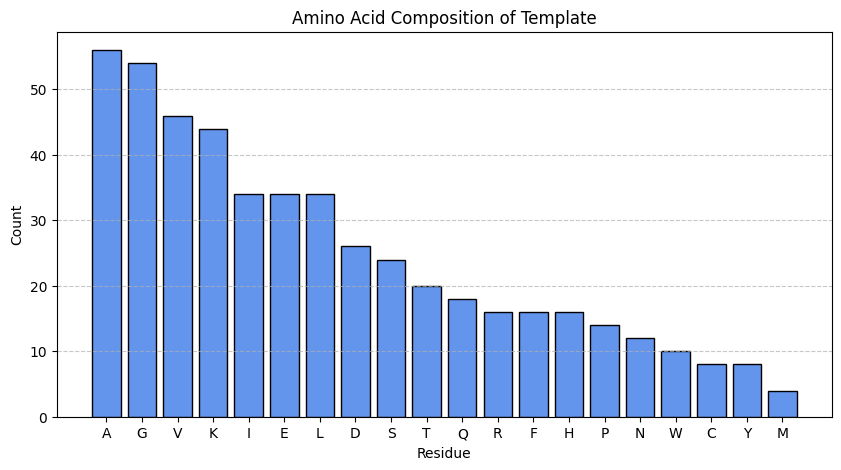

In [12]:
counts = Counter(template_seq)
df_counts = pd.DataFrame(counts.items(), columns=["Residue", "Count"]).sort_values("Count", ascending=False)

plt.figure(figsize=(10,5))
plt.bar(df_counts["Residue"], df_counts["Count"], color='cornflowerblue', edgecolor='black')
plt.title("Amino Acid Composition of Template")
plt.xlabel("Residue")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 📋 Table of Residue Counts
Sorted, with a blue gradient for easy viewing.


In [13]:
df_counts.reset_index(drop=True, inplace=True)
df_counts.style.background_gradient(cmap='Blues')

,Residue,Count
0,A,56
1,G,54
2,V,46
3,K,44
4,I,34
5,E,34
6,L,34
7,D,26
8,S,24
9,T,20


## 🧬 Global Alignment of Target vs Template
Using pairwise2 for a quick similarity check.


In [14]:
alignments = pairwise2.align.globalxx(target_seq, template_seq)
top_alignment = alignments[0]

print(f"✅ Alignment score: {top_alignment.score}")
print(pairwise2.format_alignment(*top_alignment))

✅ Alignment score: 33.0
------------M--K---------T----------------------F-----------------------F------------------L-------V------L--------L---L------------------------------------S----A------------------------L-------V--AVA--S------S----------S---V------------------------R----G---------------------A----------GA-------A--------G-----------G------------------V-L---------------------------------------------T--------------------------P----------------------------------------------------------------------------------
            |  |         |                      |                       |                  |       |      |        |   |                                    |    |                        |       |  |||  |      |          |   |                        |    |                     |          ||       |        |           |                  | |                                             |                          |                                                                     

## ✅ Conclusion
This notebook:
- Downloaded a known **template protein PDB file**
- Extracted its amino acid sequence
- Uploaded your **target sequence**
- Compared them with a global alignment
- Provided amino acid composition visuals

---


